In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
TN_Places = gpd.read_file("cb_2024_47_place_500k.shp")
print(TN_Places)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID              NAME  \
0        47   15400  02404070  1600000US4715400  4715400         Cleveland   
1        47   07840  02405310  1600000US4707840  4707840            Braden   
2        47   69420  02407356  1600000US4769420  4769420            Smyrna   
3        47   43640  02406043  1600000US4743640  4743640  Lookout Mountain   
4        47   12380  02406243  1600000US4712380  4712380        Centertown   
..      ...     ...       ...               ...      ...               ...   
499      47   59240  02407135  1600000US4759240  4759240     Pleasant Hill   
500      47   78600  02405696  1600000US4778600  4778600        Waynesboro   
501      47   36580  02405874  1600000US4736580  4736580        Huntingdon   
502      47   46700  02405042  1600000US4746700  4746700      Maynardville   
503      47   35220  02813070  1600000US4735220  4735220          Holladay   

                  NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AW

In [3]:
city_name = TN_Places[['NAME']]
city_limit = TN_Places[['geometry']]
print(city_name, city_limit)

                 NAME
0           Cleveland
1              Braden
2              Smyrna
3    Lookout Mountain
4          Centertown
..                ...
499     Pleasant Hill
500        Waynesboro
501        Huntingdon
502      Maynardville
503          Holladay

[504 rows x 1 columns]                                               geometry
0    MULTIPOLYGON (((-84.84752 35.15914, -84.84608 ...
1    POLYGON ((-89.58817 35.36451, -89.5825 35.3799...
2    MULTIPOLYGON (((-86.46977 35.99828, -86.46976 ...
3    POLYGON ((-85.36481 34.98602, -85.3621 34.9869...
4    POLYGON ((-85.92835 35.72506, -85.92639 35.724...
..                                                 ...
499  POLYGON ((-85.21976 35.97981, -85.21572 35.983...
500  POLYGON ((-87.7915 35.3145, -87.78527 35.32377...
501  POLYGON ((-88.48524 36.03751, -88.48088 36.038...
502  POLYGON ((-83.84705 36.22816, -83.84461 36.229...
503  POLYGON ((-88.16207 35.86727, -88.15844 35.866...

[504 rows x 1 columns]


<Axes: >

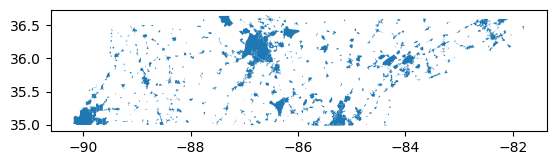

In [4]:
city_limit.plot()

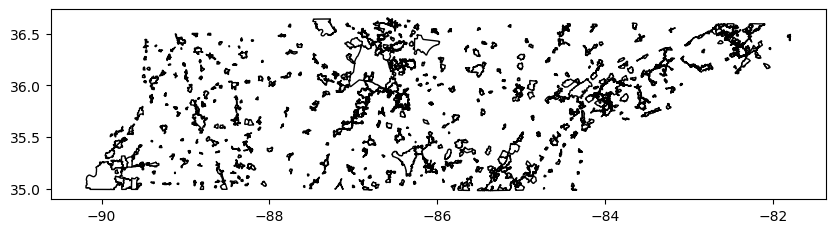

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
city_limit.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [6]:
city_limit.area

C:\Users\alayn\AppData\Local\Temp\ipykernel_36700\701153236.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city_limit.area


0      0.007974
1      0.000944
2      0.008879
3      0.000343
4      0.000239
         ...   
499    0.000426
500    0.001096
501    0.003081
502    0.001404
503    0.000377
Length: 504, dtype: float64

In [7]:
city_limit.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [8]:
city_limit_proj = city_limit.to_crs('EPSG:26916')

In [9]:
city_limit_proj.area

0      8.059428e+07
1      9.524402e+06
2      8.880313e+07
3      3.468888e+06
4      2.398696e+06
           ...     
499    4.264248e+06
500    1.105040e+07
501    3.081212e+07
502    1.401958e+07
503    3.773391e+06
Length: 504, dtype: float64

In [10]:
city_MBC = city_limit_proj.minimum_bounding_circle()

<Axes: >

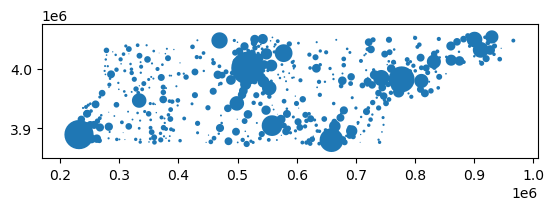

In [11]:
city_MBC.plot()

In [12]:
city_MBC.area

0      2.877187e+08
1      3.377354e+07
2      3.073815e+08
3      1.118504e+07
4      4.112523e+06
           ...     
499    1.205113e+07
500    6.017420e+07
501    1.091754e+08
502    5.310768e+07
503    9.707320e+06
Length: 504, dtype: float64

In [13]:
city_ratio = city_limit_proj.area/city_MBC.area
print(city_ratio)

0      0.280115
1      0.282008
2      0.288902
3      0.310136
4      0.583266
         ...   
499    0.353846
500    0.183640
501    0.282226
502    0.263984
503    0.388716
Length: 504, dtype: float64


In [14]:
city_ratio.median()

np.float64(0.35603980652333445)

In [15]:
somewhat_circle_city_mask = city_ratio > 0.65
somewhat_circle_city = city_ratio[somewhat_circle_city_mask]
somewhat_circle_city

61     0.675017
78     0.670927
349    0.683869
356    0.675572
379    0.661017
466    0.653906
489    0.654488
dtype: float64

In [16]:
circle_cities = city_limit.iloc[somewhat_circle_city.index]
circle_cities

,geometry
61,"POLYGON ((-86.10419 35.53963, -86.10318 35.541..."
78,"POLYGON ((-86.38998 36.57534, -86.38384 36.581..."
349,"POLYGON ((-86.5788 36.52018, -86.57776 36.5218..."
356,"POLYGON ((-85.04461 36.05722, -85.04349 36.058..."
379,"POLYGON ((-85.24868 35.31605, -85.246 35.31908..."
466,"POLYGON ((-88.21466 36.43774, -88.21402 36.438..."
489,"POLYGON ((-85.27607 35.28296, -85.2714 35.2885..."


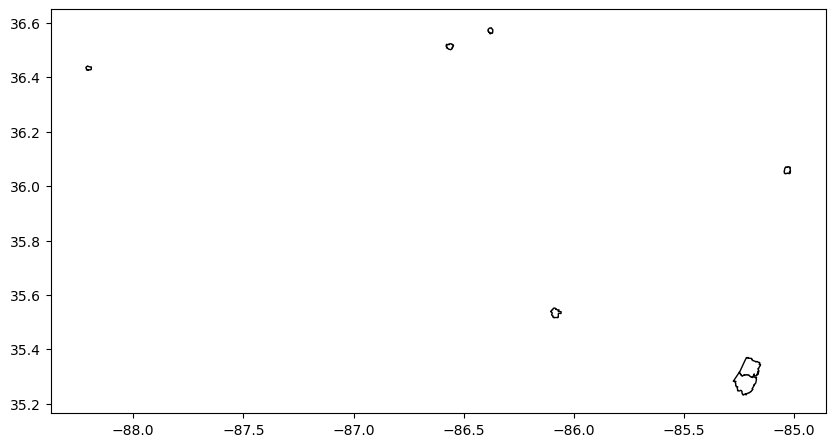

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
circle_cities.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [18]:
circle_cities_names = city_name.iloc[circle_cities.index]
circle_cities_names

,NAME
61,New Union
78,Oak Grove
349,New Deal
356,Bowman
379,Flat Top Mountain
466,Buchanan
489,Mowbray Mountain
